In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import sklearn
warnings.filterwarnings('ignore')

In [78]:
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
data=pd.read_csv(r'C:\Users\Saisha Shetty\Desktop\files\Iris.csv')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [36]:
data['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

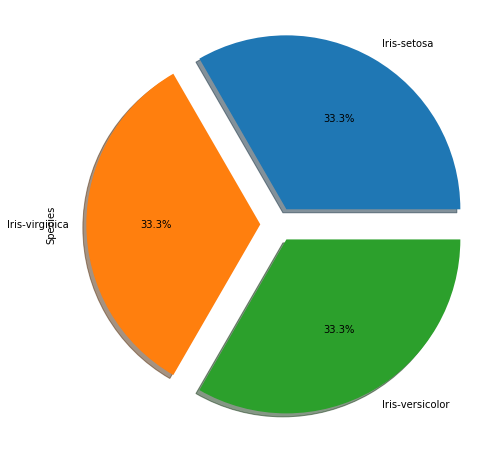

In [34]:
data['Species'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(10,8))

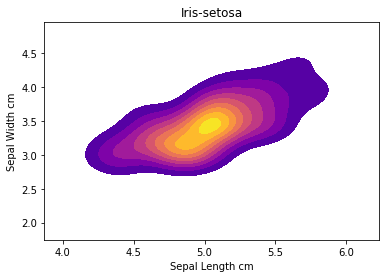

In [90]:
iris = data.drop('Id',axis=1)
sub=iris[iris['Species']=='Iris-setosa']
sns.kdeplot(data=sub[['SepalLengthCm','SepalWidthCm']],cmap="plasma", shade=True, shade_lowest=False)
plt.title('Iris-setosa')
plt.xlabel('Sepal Length cm')
plt.ylabel('Sepal Width cm')
plt.show()

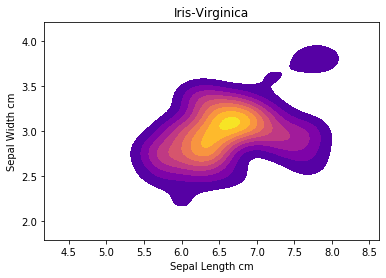

In [93]:
iris = data.drop('Id',axis=1)
sub=iris[iris['Species']=='Iris-virginica']
sns.kdeplot(data=sub[['SepalLengthCm','SepalWidthCm']],cmap="plasma", shade=True, shade_lowest=False)
plt.title('Iris-Virginica')
plt.xlabel('Sepal Length cm')
plt.ylabel('Sepal Width cm')
plt.show()

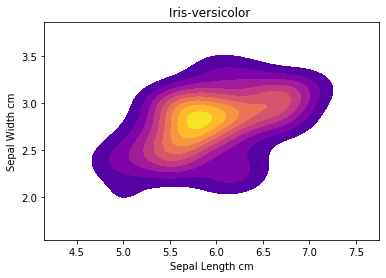

In [94]:
iris = data.drop('Id',axis=1)
sub=iris[iris['Species']=='Iris-versicolor']
sns.kdeplot(data=sub[['SepalLengthCm','SepalWidthCm']],cmap="plasma", shade=True, shade_lowest=False)
plt.title('Iris-versicolor ')
plt.xlabel('Sepal Length cm')
plt.ylabel('Sepal Width cm')
plt.show()

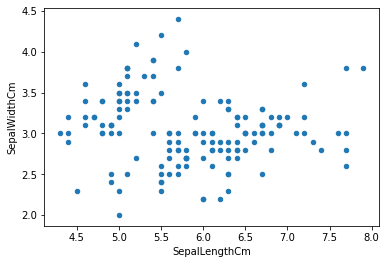

In [5]:
data.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")

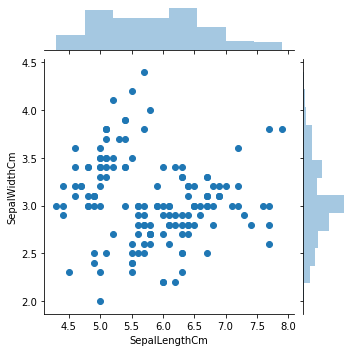

In [6]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=data, size=5)

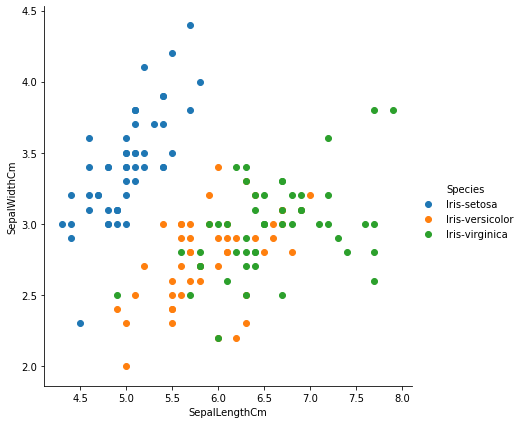

In [7]:
sns.FacetGrid(data, hue="Species", size=6) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

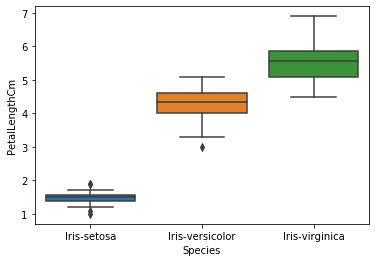

In [8]:
sns.boxplot(x="Species",y="PetalLengthCm",data=data)

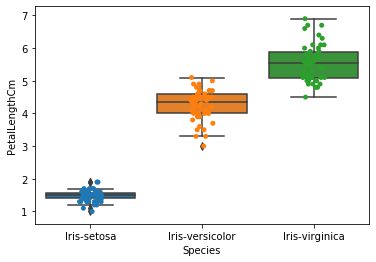

In [9]:
ax=sns.boxplot(x="Species",y="PetalLengthCm",data=data)
ax=sns.stripplot(x="Species",y="PetalLengthCm",data=data, jitter=True,edgecolor='black')
#jitter=True so that we get the points scattered and not on the vertical line

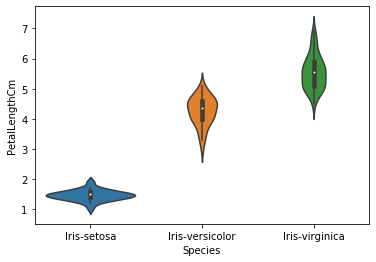

In [10]:
sns.violinplot(x='Species',y='PetalLengthCm',data=data)

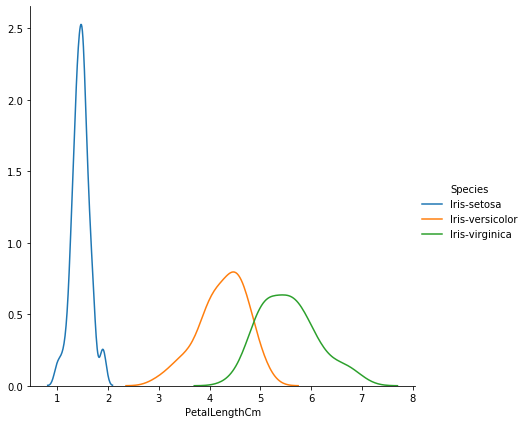

In [11]:
sns.FacetGrid(data,hue='Species',size=6) \
    .map(sns.kdeplot,"PetalLengthCm" ) \
    .add_legend()

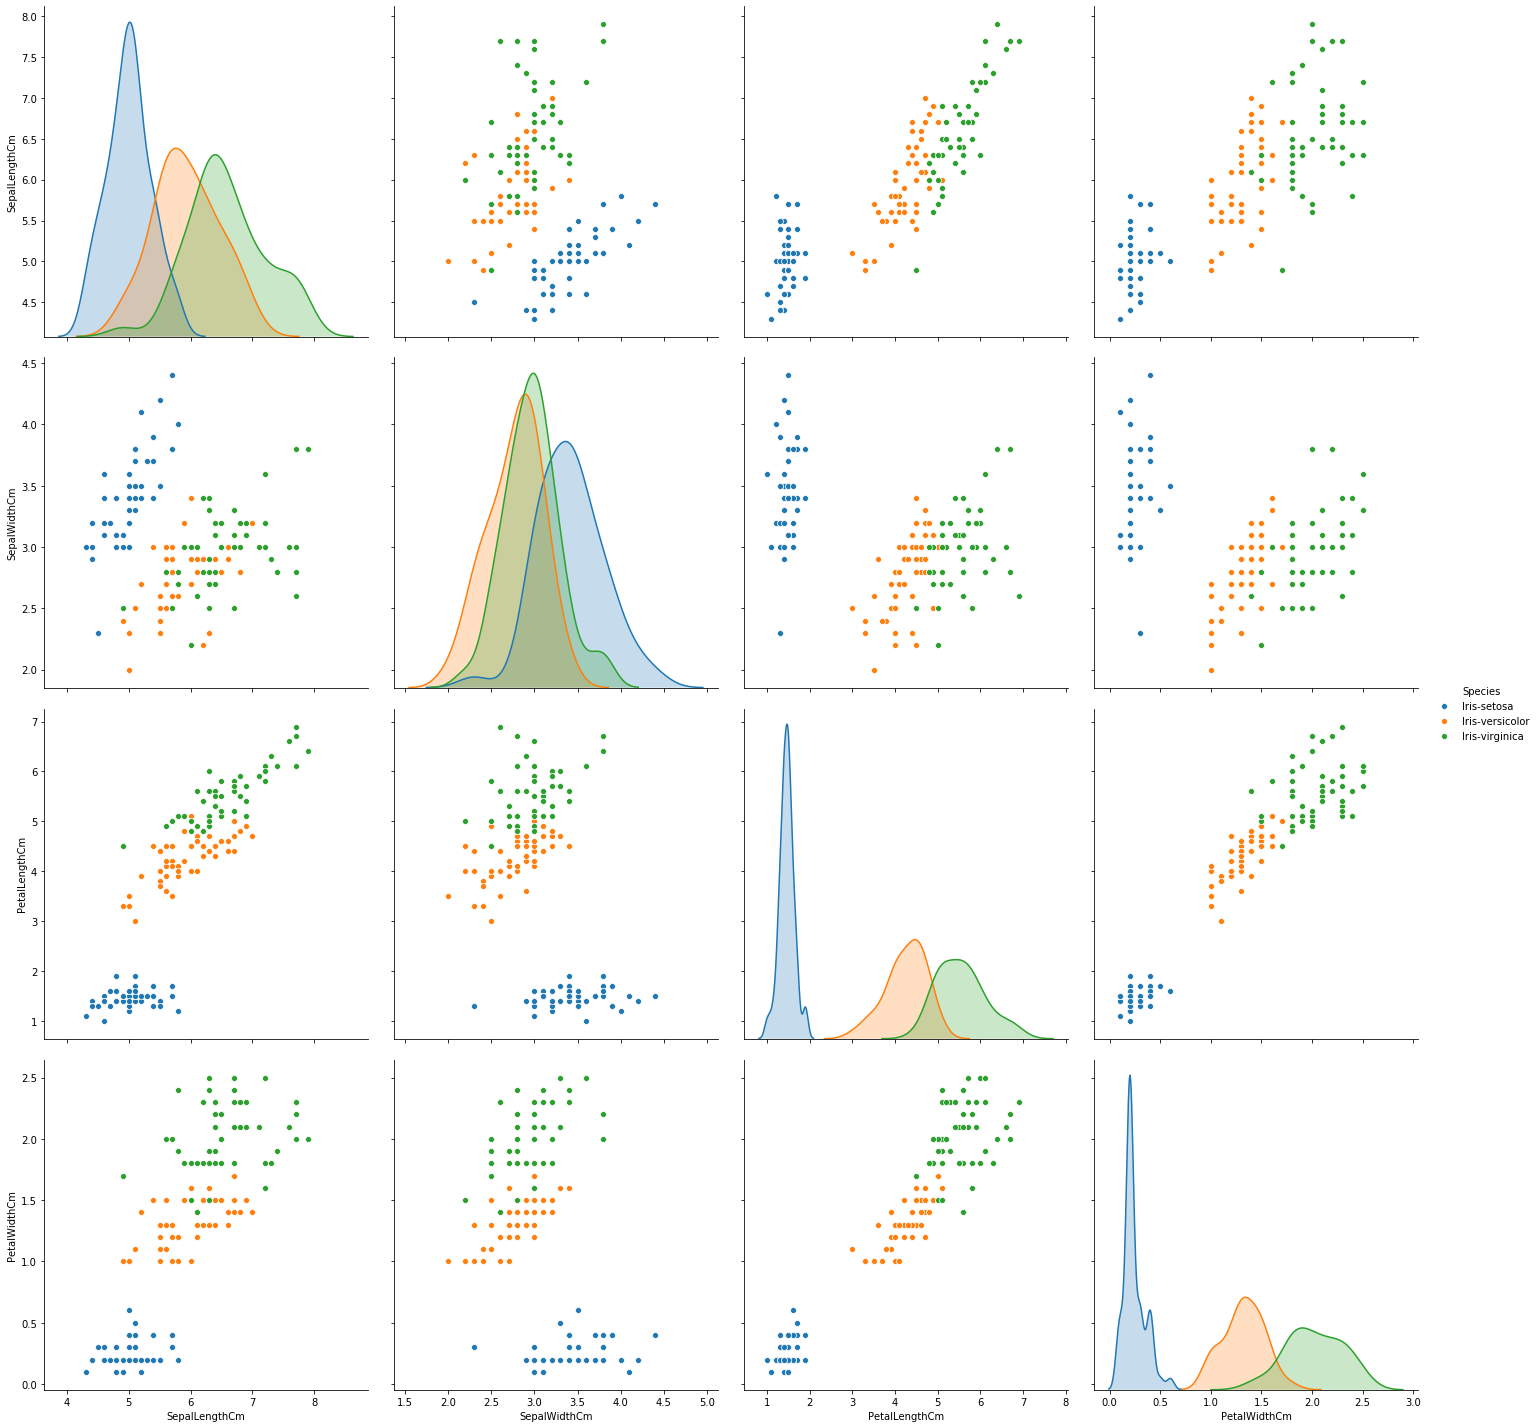

In [12]:
sns.pairplot(data.drop("Id",axis=1),hue="Species",size=5)

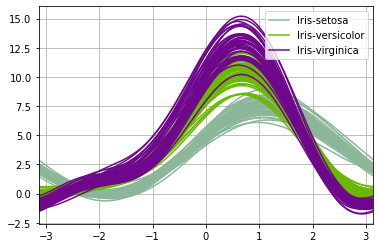

In [22]:
import pandas.plotting as pdplt
pdplt.andrews_curves(data.drop("Id",axis=1),"Species")
#andrew curves

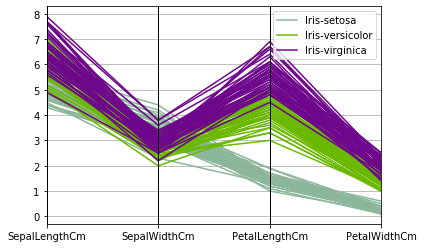

In [23]:
import pandas.plotting as pdplt
pdplt.parallel_coordinates(data.drop("Id",axis=1),"Species")
#parallel_coordinates

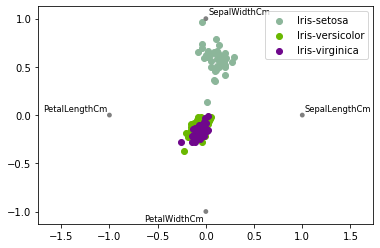

In [24]:
import pandas.plotting as pdplt
pdplt.radviz(data.drop("Id",axis=1),"Species")
#radviz

In [40]:
from  sklearn import  datasets
iris=datasets.load_iris()
x=iris.data
y=iris.target

In [49]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.4)
from sklearn import neighbors
classifier=neighbors.KNeighborsClassifier()
classifier.fit(x_train,y_train)
predictions=classifier.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))

0.9666666666666667


In [75]:

array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.951807 (0.052427)
LDA: 0.976923 (0.035251)
KNN: 0.951807 (0.052427)
CART: 0.953205 (0.061888)
NB: 0.952448 (0.062375)
SVM: 0.984615 (0.030769)


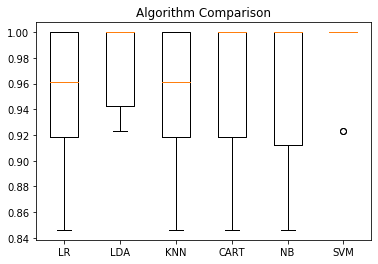

In [76]:
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [85]:
model = SVC(gamma='auto')
model.fit(X_train, Y_train)

predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

